In [1]:
#hide
from utils import *

from fastai2.vision.all import *
path = untar_data(URLs.PETS)

#hide
Path.BASE_PATH = path

In [2]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [3]:
(path/"images").ls()

(#7393) [Path('images/Ragdoll_128.jpg'),Path('images/havanese_60.jpg'),Path('images/chihuahua_183.jpg'),Path('images/great_pyrenees_48.jpg'),Path('images/keeshond_144.jpg'),Path('images/pomeranian_192.jpg'),Path('images/samoyed_79.jpg'),Path('images/keeshond_77.jpg'),Path('images/Ragdoll_235.jpg'),Path('images/english_setter_50.jpg')...]

In [4]:
fname = (path/"images").ls()[0]
re.findall(r'(.+)_\d+.jpg$', fname.name)


['Ragdoll']

In [5]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

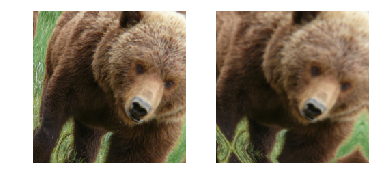

In [6]:
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'grizzly.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

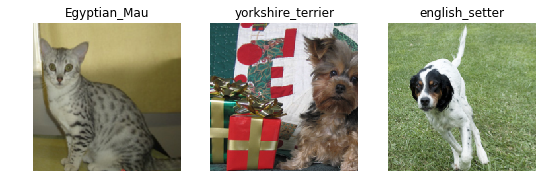

In [8]:
dls.show_batch(nrows=1, ncols=3)

In [9]:

#hide_output
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/vinicius/.fastai/data/oxford-iiit-pet/images/chihuahua_87.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x332
  Pipeline: partial -> Categorize
    starting from
      /home/vinicius/.fastai/data/oxford-iiit-pet/images/chihuahua_87.jpg
    applying partial gives
      chihuahua
    applying Categorize gives
      TensorCategory(17)

Final sample: (PILImage mode=RGB size=500x332, TensorCategory(17))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: ToTensor
    starting from
      (PILImage mode=RGB size=500x332, TensorCategory(17))
    applying ToTensor gives
      (TensorImag

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 332 and 500 in dimension 2 at /pytorch/aten/src/TH/generic/THTensor.cpp:612